In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import pickle 
from matplotlib import style 

data = pd.read_csv("data.csv", sep=";")
print(type(data))
data = data[["G1","G2","absences","health","Walc","Dalc","goout","freetime","famrel","Fedu","Medu","age","failures","studytime","traveltime","G3"]]

ModuleNotFoundError: No module named 'sklearn'

In [215]:
#train the model 

predict = "G3"
x = np.array(data.drop(predict, axis=1))  # x =  what to predit from ? all attribi=utes  
y = np.array(data[predict])  # y = what to predict  
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  # splits the data , uses only 90% data for training , keeps 10% for testing  
best = 0
for _ in range(9000):
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  # splits the data , uses only 90% data for training , keeps 10% for testing  
    linear = linear_model.LinearRegression() 
    linear.fit(x_train, y_train) #training 
    acc = linear.score(x_test,y_test)

    if(acc>best):
        best=acc
        print("accuracy of the trained model : ",acc)
        with open ("studentmodel.pickle","wb") as f: # stores the latest trained model 
            pickle.dump(linear,f)


accuracy of the trained model :  0.9013762989523721
accuracy of the trained model :  0.9062849387034506
accuracy of the trained model :  0.90963443617273
accuracy of the trained model :  0.9299794492690104
accuracy of the trained model :  0.9419006002760594
accuracy of the trained model :  0.9505460865081202
accuracy of the trained model :  0.9524617766434477
accuracy of the trained model :  0.9527089831050132
accuracy of the trained model :  0.9556126557067117
accuracy of the trained model :  0.9661047913199908


In [216]:

pickle_in =  open("studentmodel.pickle","rb")
linear = pickle.load(pickle_in)

prediction = linear.predict(x_test)
# for i in range(len(prediction)):
#     print((int(prediction[i]),y_test[i]))


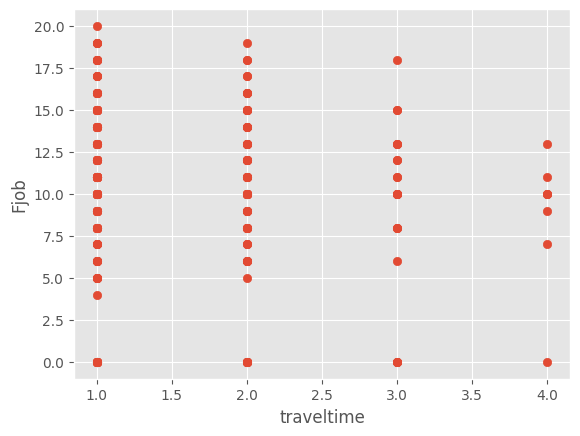

In [217]:
p='traveltime'
style.use("ggplot") # which type of plotting 
plot.scatter(data[p],data['G3']) # the two data you ar
plot.xlabel(p)
plot.ylabel("Fjob")
plot.show()